In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
data = pd.read_csv('adult.csv')

In [0]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [0]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [0]:
data = pd.get_dummies(data,columns=['workclass','education','occupation','sex','native.country','marital.status',
                                    'relationship','race'])

In [0]:
data.income = LabelEncoder().fit_transform(data.income)

In [0]:
X = data.drop('income',axis=1)
y= data.income

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
Xscale = StandardScaler().fit_transform(X)

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import  confusion_matrix,accuracy_score ,classification_report
from sklearn.naive_bayes import GaussianNB






In [0]:
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8145121941099834


In [0]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, Xscale, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172754732011717


In [0]:
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7923614437699487


In [0]:
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7377037569430877


In [0]:
X_train,X_test, y_train,y_test = train_test_split(X, y , test_size= 0.3, random_state=42)

In [0]:
from sklearn.metrics import f1_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
r1 = rf.predict(X_test)
print(f'Accuracy : {accuracy_score(r1,y_test)}')
print(f'f1_score : {f1_score(r1,y_test)}')
print(f'Matrice de confusion : {confusion_matrix(r1,y_test)}')

Accuracy : 0.8530044016787798
f1_score : 0.6668213457076566
Matrice de confusion : [[6896  903]
 [ 533 1437]]


In [0]:
from sklearn.tree import export_graphviz
estimator = rf.estimators_[5]

In [0]:
feature_names = [i for i in data.columns if i!='income']
target_name = ['income']

In [0]:
data.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [0]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = ['<=50K','>50K'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [0]:
!dot -Tpng tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.227156 to fit


In [0]:
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
gb = GradientBoostingClassifier(n_estimators=800)
gb.fit(X_train, y_train)
r2 = gb.predict(X_test)
print(f'Accuracy : {accuracy_score(r2,y_test)}')
print(f'f1_score : {f1_score(r2,y_test)}')
print(f'Matrice de confusion : {confusion_matrix(r2,y_test)}')

Accuracy : 0.8738867847271983
f1_score : 0.7103902209685002
Matrice de confusion : [[7026  829]
 [ 403 1511]]


In [0]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
r3 = ab.predict(X_test)
print(f'Accuracy : {accuracy_score(r3,y_test)}')
print(f'f1_score : {f1_score(r3,y_test)}')
print(f'Matrice de confusion : {confusion_matrix(r3,y_test)}')

Accuracy : 0.8611935715016891
f1_score : 0.6726219217769194
Matrice de confusion : [[7020  947]
 [ 409 1393]]


In [0]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
r4 = et.predict(X_test)
print(f'Accuracy : {accuracy_score(r4,y_test)}')
print(f'f1_score : {f1_score(r4,y_test)}')
print(f'Matrice de confusion : {confusion_matrix(r4,y_test)}')

Accuracy : 0.8355000511823114
f1_score : 0.6355182581084147
Matrice de confusion : [[6761  939]
 [ 668 1401]]


In [0]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
r5 = xg.predict(X_test)
print(f'Accuracy : {accuracy_score(r5,y_test)}')
print(f'f1_score : {f1_score(r5,y_test)}')
print(f'Matrice de confusion : {confusion_matrix(r5,y_test)}')

Accuracy : 0.8611935715016891
f1_score : 0.661
Matrice de confusion : [[7091 1018]
 [ 338 1322]]


In [0]:
xg = XGBClassifier(n_estimators=900)
xg.fit(X_train, y_train)
r5 = xg.predict(X_test)
print(f'Accuracy : {accuracy_score(r5,y_test)}')
print(f'f1_score : {f1_score(r5,y_test)}')
print(f'Matrice de confusion : {confusion_matrix(r5,y_test)}')

Accuracy : 0.8735796908588391
f1_score : 0.7089323591798257
Matrice de confusion : [[7030  836]
 [ 399 1504]]


In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
model.fit(X_train, y_train)
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=375418584, splitter='best')

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = feature_names,
                class_names = ['<=50K','>50K'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [0]:
!dot -Tpng tree_limited.dot -o tree_limited.png

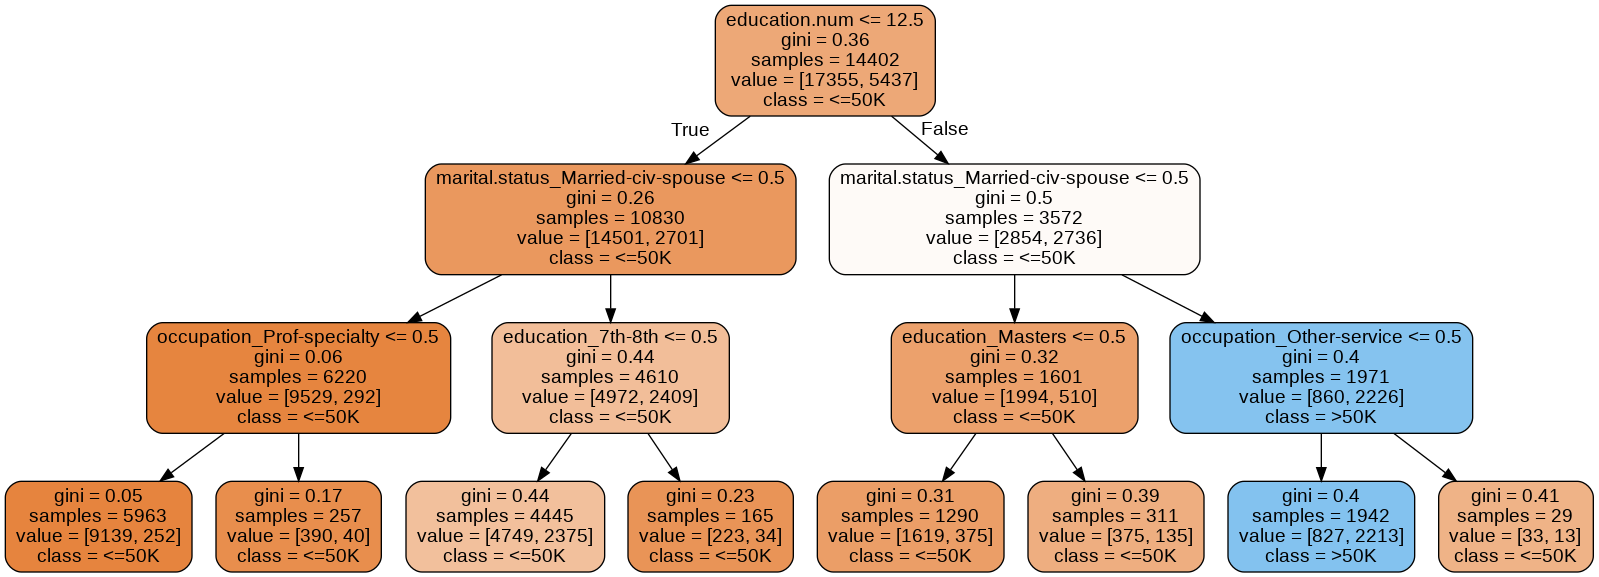

In [0]:
from IPython.display import Image
Image(filename = 'tree_limited.png')